In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
from skimage.io import imread
import util
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os
%matplotlib inline

In [2]:
data = []

for root, files in util.get_person_images('./lfw_funneled/', 'jpg', 70):
    # returns 
    person_data = util.get_dataset(root, files, 8)
    # count datasets
    data.append(person_data)
    

In [4]:
# create pandas design matrix to compute pca
keys = [item[0] for item in data]
design_matrix_data = pd.concat([item[1][:-1] for item in data], keys=keys)
design_matrix_test = pd.concat([item[1][-1:] for item in data], keys=keys)

In [5]:
print(design_matrix_data.shape)
print(design_matrix_data.index.levels)

(1281, 1024)
[['Colin_Powell', 'George_W_Bush', 'Hugo_Chavez', 'Ariel_Sharon', 'Tony_Blair', 'Gerhard_Schroeder', 'Donald_Rumsfeld'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]


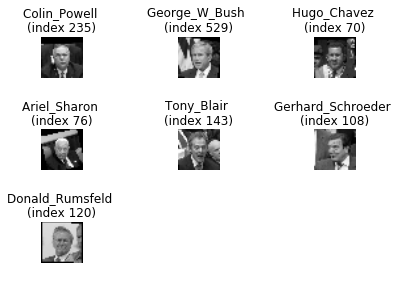

In [6]:
# Plot the test data
fig = plt.figure()
for i, (index, row) in enumerate(design_matrix_test.iterrows(), start=1):
    ax = plt.subplot(3,3,i)
    ax.set_title("{} \n(index {})".format(index[0], index[1]))
    plt.axis('off')
    plt.tight_layout()
    dim = np.sqrt(np.shape(row))
    plt.imshow(np.reshape(row, (dim, dim)), cmap=plt.gray(), )

In [7]:
Qi, Ai, Sigma = util.pca(design_matrix_data)
Qi.shape, Ai.shape, Sigma.shape

((1024, 1024), (1281, 1024), (1024,))

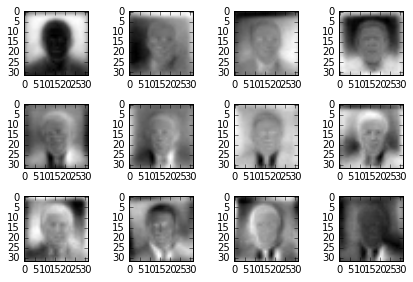

In [18]:
# Plot the first 12 eigenfaces
fig = plt.figure()
for i, eigenface in enumerate(Qi[:12], start=1):
    plt.subplot(3, 4, i)
    plt.tight_layout()
    dim = np.sqrt(np.shape(eigenface)[0])
    plt.imshow(np.reshape(eigenface, (dim, dim)), cmap=plt.gray())

In [21]:
eigenvalues = Sigma**2
eigenvalues

array([  2.10841055e+04,   4.63711674e+03,   4.41854197e+03, ...,
         5.17321602e-02,   5.01261832e-02,   4.41669570e-02])

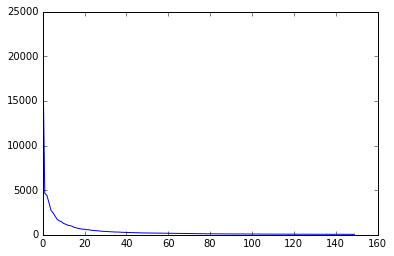

In [22]:
# Plot first 150 Eigenvalues
plt.plot(eigenvalues[:150])
plt.show()

In [25]:
Var_prop = 1/sum(eigenvalues) * eigenvalues * 100
Var_cum = Var_prop.cumsum()
Var_error = 100 - Var_cum
Var_dict = {"Varianz" :  eigenvalues, "erklärte Varianz" : Var_prop, "kumulierte erklärte Varianz" : Var_cum, "Fehler" : Var_error}
pd.DataFrame(data=Var_dict, index=["a{}".format(s) for s in range(0,1024)])

,Fehler,Varianz,erklärte Varianz,kumulierte erklärte Varianz
a0,7.458237e+01,21084.105530,25.417634,25.417634
a1,6.899216e+01,4637.116742,5.590208,31.007842
a2,6.366545e+01,4418.541975,5.326708,36.334550
a3,5.933374e+01,3593.186496,4.331713,40.666264
a4,5.605914e+01,2716.300216,3.274596,43.940859
a5,5.310433e+01,2451.036254,2.954811,46.895670
a6,5.062434e+01,2057.166171,2.479986,49.375657
a7,4.856230e+01,1710.477749,2.062041,51.437698
a8,4.668090e+01,1560.636639,1.881403,53.319101
a9,4.491749e+01,1462.758087,1.763407,55.082507


In [26]:
aligned_test = util.align(design_matrix_test)
aligned_test

,,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Colin_Powell,235,-0.067469,-0.066688,-0.075425,-0.107482,-0.095596,-0.070046,-0.026191,-0.023185,-0.025358,-0.087482,...,-0.093104,0.116255,-0.088478,-0.149103,-0.050779,-0.067179,-0.033517,-0.162122,-0.049671,0.108864
George_W_Bush,529,-0.066636,0.097839,0.087680,0.051593,-0.015834,-0.040596,-0.018616,-0.011963,-0.021437,-0.084677,...,-0.010846,-0.041827,-0.020210,-0.088678,0.027587,0.010592,0.028017,0.021799,-0.150761,-0.097267
Hugo_Chavez,70,-0.067469,-0.066688,-0.075425,-0.107482,-0.095596,-0.070046,-0.026191,-0.023185,-0.025358,-0.087482,...,-0.017136,-0.057909,-0.029014,-0.094685,-0.073958,-0.008570,-0.009110,-0.008868,-0.149630,-0.096702
Ariel_Sharon,76,-0.067469,-0.066688,-0.075425,-0.107482,-0.095596,-0.070046,-0.026191,-0.023185,-0.025358,-0.087482,...,-0.237904,-0.266347,-0.250348,-0.316019,-0.212940,-0.223736,-0.219780,-0.211696,-0.150761,-0.097267
Tony_Blair,143,-0.064664,-0.065854,-0.001481,0.088895,0.085376,0.063868,0.015859,0.010434,0.019216,-0.021902,...,-0.106484,-0.139979,-0.087555,-0.152660,-0.051821,-0.036550,-0.028673,-0.008824,0.039781,0.046781
Gerhard_Schroeder,108,0.401176,0.234765,0.215499,0.289438,0.312277,0.256346,0.103601,0.094269,0.103654,0.456509,...,0.701444,0.654785,0.723453,0.621096,0.132584,0.087304,0.103322,0.120098,0.173190,0.232860
Donald_Rumsfeld,120,-0.067469,-0.066688,-0.075425,-0.107482,-0.095031,-0.069480,-0.022270,-0.023185,-0.025358,-0.087482,...,-0.235970,-0.264978,-0.247848,0.180048,0.229327,0.238138,0.159741,0.249613,0.287852,-0.097267


In [57]:
ai_data = Ai[:,:7]
a_test  = []
test_names = design_matrix_test.index.levels[0]

for index, x in design_matrix_test.iterrows():
    a_test.append([x.dot(q) for q in Qi[:7]])

In [82]:
substracted = [pd.DataFrame(ai_data).sub(a) for a in a_test]

frames = []

for frame in substracted:
    frames.append(frame.apply(lambda values: sum([v**2 for v in values]), axis=1))

AttributeError: 'DataFrame' object has no attribute 'rows'